# 6.6- Sourcing and analyzing Time series data

### This script contains the following:
### 1. Importing your libraries and data
### 2. Time series analysis: decomposition
### 3. Testing for stationarity
### 4. Stationarizing the US Candy Production data

### 1.Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') 

In [2]:
path=r'C:\Users\Usha Bharati\Downloads\candy'

In [3]:
data=pd.read_csv(os.path.join(path,'candy_production.csv'))

In [4]:
data.head()

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


In [5]:
data.rename(columns={'observation_date':'Date','IPG3113N': 'Production_Index'}, inplace=True)

In [6]:
data.head()

,Date,Production_Index
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


In [7]:
data.shape

(548, 2)

In [8]:
data.columns

Index(['Date', 'Production_Index'], dtype='object')

In [9]:
type(data)

pandas.core.frame.DataFrame

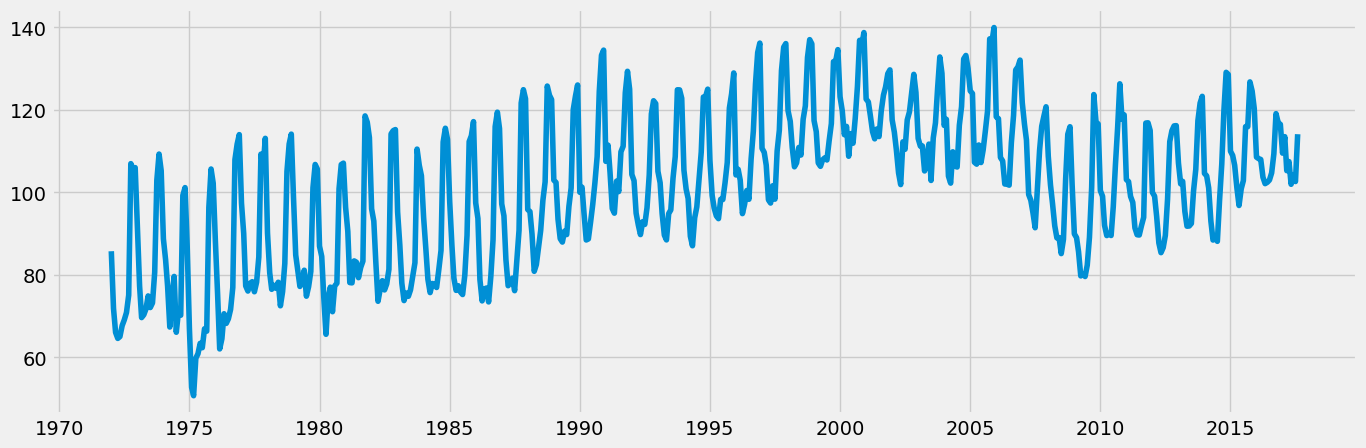

In [36]:
# Plotting the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

### 2. Wrangling the dataset

In [12]:
# Converting Date column to datetime 
data['Date'] = pd.to_datetime(data['Date'])

In [13]:
# Setting the 'Date' column as the index of the DataFrame 'data'.
data.set_index('Date', inplace=True)

## 3. Time series analysis- Decomposition

In [16]:
# Decomposing the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [17]:
from pylab import rcParams # This will define a fixed size for all special charts.
rcParams['figure.figsize'] = 18, 7

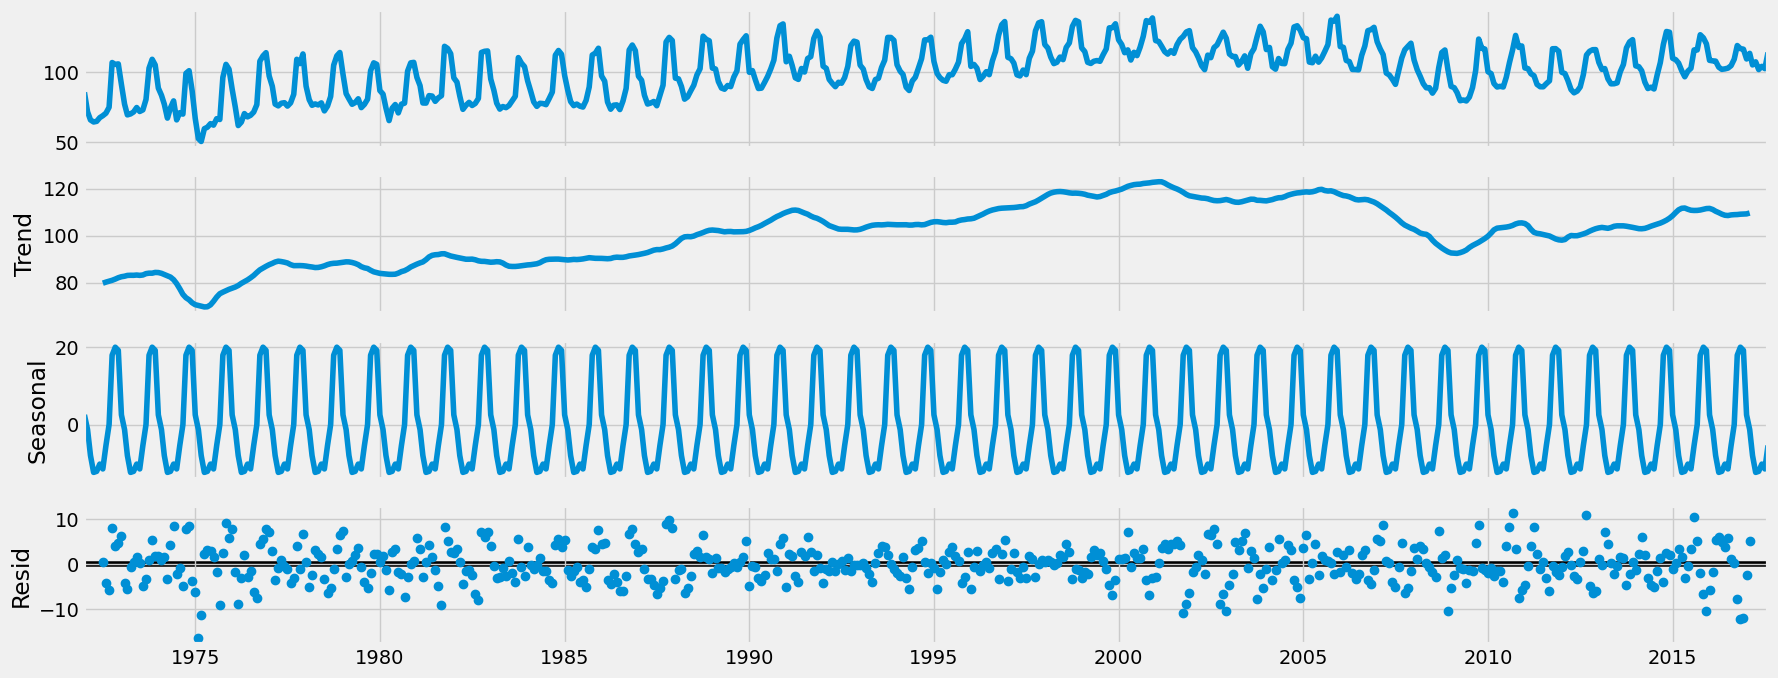

In [18]:
# Plotting the separate components
decomposition.plot()
plt.show()

### From the above plot we can observe that trend is having fluctuations from 80 to 120 and residual is having a lot of variation. Seasonality shows variation from negative value to 20.

## 4. Testing for Stationarity

In [19]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that arr

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Production_Index'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.887050
p-value                          0.338178
Number of Lags Used             14.000000
Number of Observations Used    533.000000
Critical Value (1%)             -3.442678
Critical Value (5%)             -2.866978
Critical Value (10%)            -2.569666
dtype: float64


### p-value is significantly higher so the evidence for null hypothesis which is the presence of a unit root is very low.
### Also test statistic is not smaller than crictial value of 5% and 10%
### The above two points indicate that the data is non stationary.
### To make the data stationary, differencing method is applied.

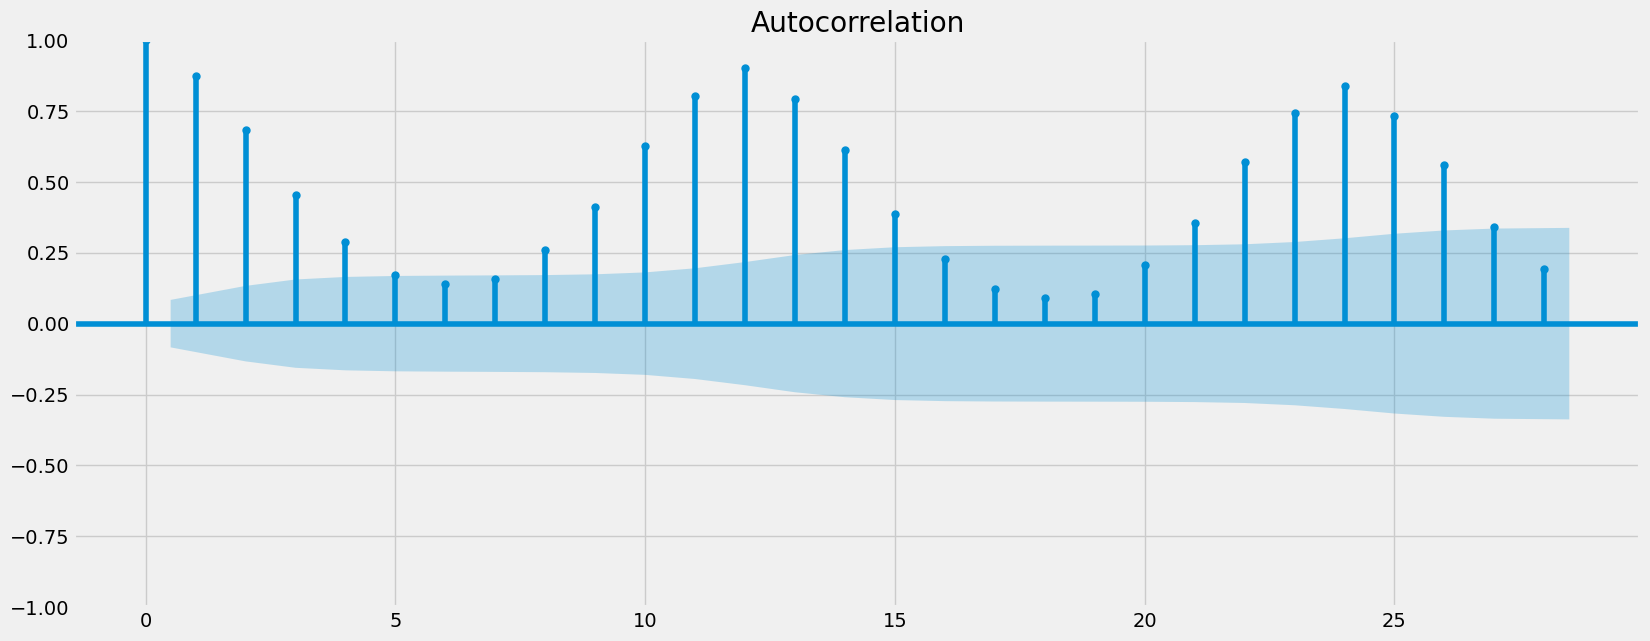

In [20]:
# Checking out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data)
plt.show()

## 5. Stationarizing the Candy Production data

In [21]:
data_diff = data - data.shift(1)  # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [22]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [23]:
data_diff.head()

,Production_Index
Date,
1972-02-01,-13.8745
1972-03-01,-5.7971
1972-04-01,-1.4584
1972-05-01,0.4455
1972-06-01,2.6367


In [24]:
data_diff.columns

Index(['Production_Index'], dtype='object')

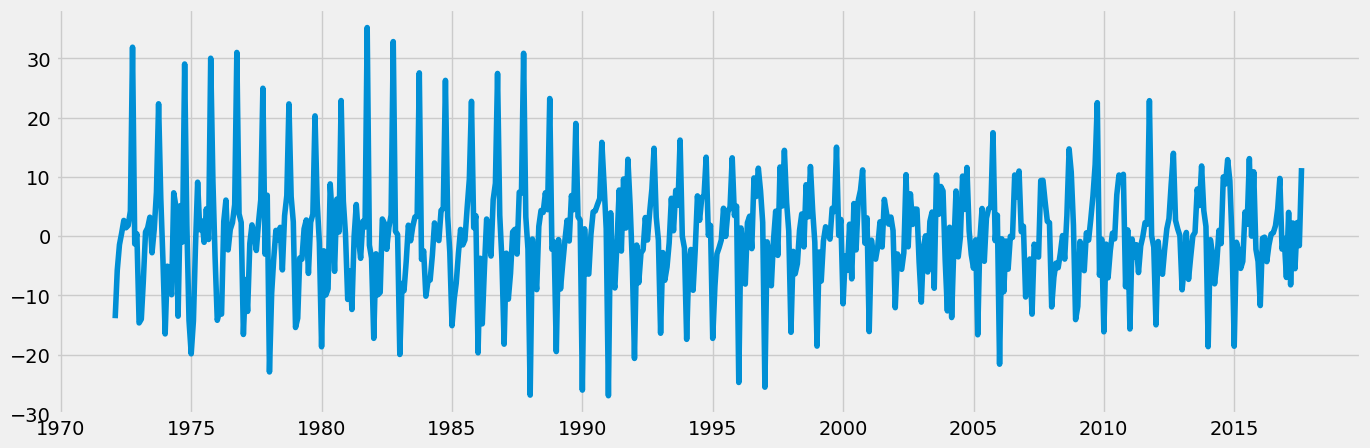

In [25]:
# Checking out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [26]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -6.119512e+00
p-value                        8.925584e-08
Number of Lags Used            1.300000e+01
Number of Observations Used    5.330000e+02
Critical Value (1%)           -3.442678e+00
Critical Value (5%)           -2.866978e+00
Critical Value (10%)          -2.569666e+00
dtype: float64


### After differencing method is applied, it is observed that a lot of seasonality is reduced. 
### Also, p value is very low and test statistic is also less than critical value of 5% and 10%

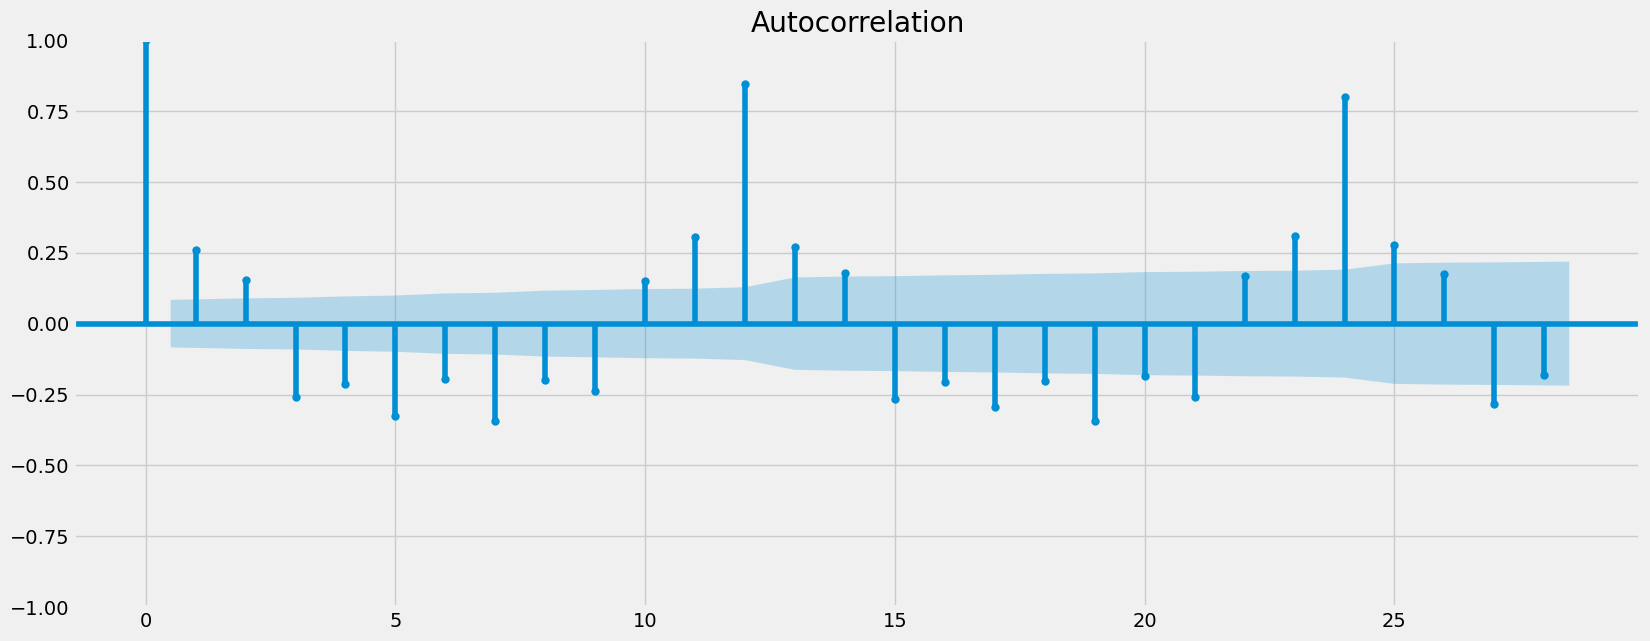

In [27]:
plot_acf(data_diff)
plt.show()

### Even though autocorrelation shows improvement after differencing, still it is not perfect. Dickey Fuller test implies data being stationary but with autocorrelation plot we can see that it is still weak.